# PROJECT 4: Solar Power Generation Data 
## Student: Elisa Tremolada (2013013) 

Data: http://www.dei.unipd.it/~silvello/FIS2020/Solar_Power.zip
Description: This data has been gathered at two solar power plants in India over a 34 day period. It has two pairs of files - each pair has one power generation dataset and one sensor readings dataset. The power generation datasets are gathered at the inverter level - each inverter has multiple lines of solar panels attached to it. The sensor data is gathered at a plant level - a single array of sensors optimally placed at the plant.
Output: 
* A Python notebook answering the following questions: 

1.	What is the mean value of daily yield? 
2.	What is the total irradiation per day? 
3.	What is the max ambient and module temperature? 
4.	How many inverters are there for each plant? 
5. What is the maximum/minimum amount of DC/AC Power generated in a time interval/day? 
6.	Which inverter (source_key) has produced maximum DC/AC power? 
7.	Rank the inverters based on the DC/AC power they produce
8.	Is there any missing data?

* Graphs that explain the patterns for attributes independent of other variables. These will usually be tracked as changes of attributes against DATETIME, DATE, or TIME, for example: 

1.	How is DC or AC Power changing as time goes by? 
2.	How is irradiation changing as time goes by?
3.	How are ambient and module temperature changing as time goes by?
4.	How does yield change as time goes by? 
5.	Explore plotting variables against different granularities of DATETIME and which is the best option for each variable.

NB: Since no units of measure were provided in the dataset and there was no information document attached, the values will be returned as numbers. 



# Answers to questions 1-8: 

1. The mean value of daily yield for plants 1 and 2 combined is: 3295.433783
2. The total irradiation per day for plants 1 and 2 combined is described by this table: can be found in code at 'Question 2'
<br>
3. * The maximum value of ambient temperature for plants 1 and 2 combined is: 39.181638",
   * The maximum value of module temperature for plants 1 and 2 combined is: 66.635953",
4. There are 22 inverters in each plant.
5. Minimum DC power / time interval = 0.000000
<br>
   Maximum DC power / time interval = 14471.125000
   <br>
   Minimum AC power / time interval = 0.000000
   <br>
   Maximum AC power / time interval = 1410.950000
   <br>
   Minimum DC power / day = 0.000000
   <br>
   Maximum DC power / day = 14471.125000
   <br>
   Minimum AC power / day = 0.000000
   <br>
   Maximum AC power / day = 1410.950000
   <br>
6. The inverter with identification code(source_key) 'adLQvlD726eNBSB' produced maximum DC power (1.019778e+07)
<br>
   The same inverter with identification code(source_key) 'adLQvlD726eNBSB' produced maximum AC power (997125.156663)  
   <br>
7. Ranking of the inverters based on AC/DC power they produce: can be found in code at 'Question 7'
8. There is no missing data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
data = "Solar_Power"
# load data from csv
plant1_gen_data = pd.read_csv(f"{data}/Plant_1_Generation_Data.csv".format())
plant2_gen_data = pd.read_csv(f"{data}/Plant_2_Generation_Data.csv".format())

plant1_wea_data = pd.read_csv(f"{data}/Plant_1_Weather_Sensor_Data.csv".format())
plant2_wea_data = pd.read_csv(f"{data}/Plant_2_Weather_Sensor_Data.csv".format())

plant1_gen_data["DATE_TIME"] = pd.to_datetime(plant1_gen_data['DATE_TIME'], format="%d-%m-%Y %H:%M")
plant2_gen_data["DATE_TIME"] = pd.to_datetime(plant2_gen_data['DATE_TIME'], format="%Y-%m-%d %H:%M:%S")
plant1_wea_data["DATE_TIME"] = pd.to_datetime(plant1_wea_data['DATE_TIME'], format="%Y-%m-%d %H:%M:%S")
plant2_wea_data["DATE_TIME"] = pd.to_datetime(plant2_wea_data['DATE_TIME'], format="%Y-%m-%d %H:%M:%S")

# concatenate dataframes and cast to datetime DATE_TIME column
gen_data = pd.concat([plant1_gen_data, plant2_gen_data], axis=0)
wea_data = pd.concat([plant1_wea_data, plant2_wea_data], axis=0)

# print(list(gen_data))
# print(list(wea_data))
# print(gen_data.dtypes)
# print(list(gen_data["DATE_TIME"])[-1]-list(gen_data["DATE_TIME"])[0])
# print(wea_data["PLANT_ID"].unique())
# print(wea_data.describe())
#gen_data.set_index("DATE_TIME", inplace=True)
#wea_data.set_index("DATE_TIME", inplace=True)

gen_data_c = gen_data.copy()
#gen_data_c.set_index("DATE_TIME", inplace=True)
wea_data_c = wea_data.copy()
print(gen_data_c)
print(wea_data_c)
#wea_data_c.set_index("DATE_TIME", inplace=True)
#print(gen_data_c.index)

                DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0     2020-05-15 00:00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1     2020-05-15 00:00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2     2020-05-15 00:00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3     2020-05-15 00:00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4     2020-05-15 00:00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   
...                   ...       ...              ...       ...       ...   
67693 2020-06-17 23:45:00   4136001  q49J1IKaHRwDQnt       0.0       0.0   
67694 2020-06-17 23:45:00   4136001  rrq4fwE8jgrTyWY       0.0       0.0   
67695 2020-06-17 23:45:00   4136001  vOuJvMaM2sgwLmb       0.0       0.0   
67696 2020-06-17 23:45:00   4136001  xMbIugepa2P7lBB       0.0       0.0   
67697 2020-06-17 23:45:00   4136001  xoJJ8DcxJEcupym       0.0       0.0   

       DAILY_YIELD  TOTAL_YIELD  
0              0.0    6259559.0  
1              0.0 

C:\Users\elisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


DAILY_YIELD    3295.433783
dtype: float64

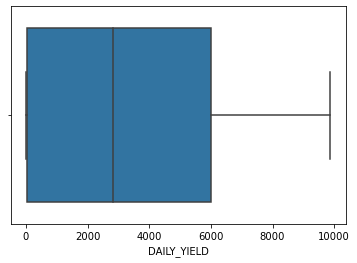

In [2]:
# Question 1: what is the mean value of daily yield? 
# It is sufficient to merge datasets plant1_gen_data and plant2_gen_data 
# and calculate the mean over the column daily yield. 
# Additionally, check for missing values or outliers. 

gen_data_c.head()
gen_data_c.isnull().any().any()

# Datasets plant1_gen_data and plant2_gen_data do not contain any missing values 

sns.boxplot(gen_data_c['DAILY_YIELD'])

# Datasets plant1_gen_data and plant2_gen_data do not contain any outliers 

# Answering question 1

daily_yield = pd.DataFrame(gen_data_c['DAILY_YIELD'])
daily_yield.head()
daily_yield.mean()


In [3]:
# Question 2: What is the total irradiation per day?

# Resampling irradiation for 1-day intervals and printing the result
wea_data_c_res = wea_data_c.resample('1D', label='left', on='DATE_TIME')["IRRADIATION"].sum().reset_index()
print(wea_data_c_res)

    DATE_TIME  IRRADIATION
0  2020-05-15    47.596065
1  2020-05-16    42.328263
2  2020-05-17    44.164973
3  2020-05-18    36.762265
4  2020-05-19    38.390182
5  2020-05-20    45.032413
6  2020-05-21    50.747355
7  2020-05-22    50.654966
8  2020-05-23    54.266632
9  2020-05-24    52.363225
10 2020-05-25    53.790291
11 2020-05-26    51.485263
12 2020-05-27    47.969505
13 2020-05-28    54.169411
14 2020-05-29    48.032870
15 2020-05-30    45.702052
16 2020-05-31    36.829418
17 2020-06-01    31.079508
18 2020-06-02    45.232268
19 2020-06-03    38.542347
20 2020-06-04    44.853754
21 2020-06-05    45.559262
22 2020-06-06    45.490619
23 2020-06-07    49.437318
24 2020-06-08    52.353971
25 2020-06-09    48.592698
26 2020-06-10    37.808615
27 2020-06-11    26.811668
28 2020-06-12    29.404517
29 2020-06-13    46.079528
30 2020-06-14    43.161852
31 2020-06-15    37.533852
32 2020-06-16    33.825042
33 2020-06-17    28.929277


In [4]:
# Question 3: what is the max ambient and module temperature?
# Using the merged dataset full_ws_data, find these values

print(wea_data_c.describe(include='all'))
# Method .describe() returns max_ambient_temperature = 39.181638, max_module_temperature =  66.635953

# Using a different method:
ambient_temp = pd.DataFrame(wea_data['AMBIENT_TEMPERATURE'])
ambient_temp.head()
print(ambient_temp.max())

module_temp = pd.DataFrame(wea_data['MODULE_TEMPERATURE'])
module_temp.head()
print(module_temp.max())


                  DATE_TIME      PLANT_ID       SOURCE_KEY  \
count                  6441  6.441000e+03             6441   
unique                 3262           NaN                2   
top     2020-06-07 06:45:00           NaN  iq8k7ZNt4Mwm3w0   
freq                      2           NaN             3259   
first   2020-05-15 00:00:00           NaN              NaN   
last    2020-06-17 23:45:00           NaN              NaN   
mean                    NaN  4.135507e+06              NaN   
std                     NaN  5.000031e+02              NaN   
min                     NaN  4.135001e+06              NaN   
25%                     NaN  4.135001e+06              NaN   
50%                     NaN  4.136001e+06              NaN   
75%                     NaN  4.136001e+06              NaN   
max                     NaN  4.136001e+06              NaN   

        AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
count           6441.000000         6441.000000  6441.000000  
uniqu

<ipython-input-4-f4da02d5883f>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(wea_data_c.describe(include='all'))


In [5]:
# Question 4: how many inverters are there for each plant?
# For this one we use single datasets 
# SOURCE_KEY contains the identification codes for each inverter
# We have to figure out how many unique identification codes there are for each plant.


#Plant 1
inverter_id1 = plant1_gen_data['SOURCE_KEY']
inverter_id1.duplicated().any()
# We now know that inverter id codes are repeated in the dataset,
inverter_id1_nodup = inverter_id1.drop_duplicates()
inverter_id1_nodup.shape
#This method returns 22 unique values for inverter id's (plant1)

(22,)

In [6]:
#Plant 2
inverter_id2 = plant2_gen_data['SOURCE_KEY']
inverter_id2.duplicated().any()
# We now know that inverter id codes are repeated in the dataset
inverter_id2_nodup = inverter_id2.drop_duplicates()
inverter_id2_nodup.shape
#This method return 22 unique values for inverter id's (plant2)

(22,)

In [7]:
# Using a different method

n_inv_1 = np.unique(inverter_id1)
print(len(n_inv_1))
n_inv_2 = np.unique(inverter_id2)
print(len(n_inv_2))

22
22


In [8]:
# Question 5: what is the maximum/minimum amount of DC/AC Power generated in a time interval/day?
# For this we can use full_gen_data combined dataset.
# Looking at the dataset we can see data is collected by each inverter every 15 minutes 
# 5.1 Calculate minimum DC power per time interval on full_gen_data 
# 5.2 Calculate maximum DC power per time interval on full_gen_data 
# 5.3 Calculate minimum AC power per time interval on full_gen_data 
# 5.4 Calculate maximum AC power per time interval on full_gen_data

gen_data_c.describe(include='all')

# Since every row of the data corresponds to data collected by each inverter every 15 minutes,
# max/min DC/AC power per time interval can be returned by running the method .describe()
# Minimum DC power / time interval = 0.000000
# Maximum DC power / time interval = 14471.125000
# Minimum AC power / time interval = 0.000000
# Maximum AC power / time interval = 1410.950000

<ipython-input-8-7fbbd428353c>:9: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  gen_data_c.describe(include='all')


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,136476,1.364760e+05,136476,136476.000000,136476.000000,136476.000000,1.364760e+05
unique,3263,NaN,44,NaN,NaN,NaN,NaN
top,2020-06-14 14:45:00,NaN,V94E5Ben1TlhnDV,NaN,NaN,NaN,NaN
freq,44,NaN,3259,NaN,NaN,NaN,NaN
first,2020-05-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-06-17 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.135497e+06,NaN,1708.541497,274.803511,3295.433783,3.303821e+08
std,NaN,4.999862e+02,NaN,3222.181273,380.182569,3035.294425,6.085705e+08
min,NaN,4.135001e+06,NaN,0.000000,0.000000,0.000000,0.000000e+00
25%,NaN,4.135001e+06,NaN,0.000000,0.000000,28.321429,6.520020e+06


In [9]:
# 5.5 Calculate minimum DC power per day  on full_gen_data: 5.343322e+06
# 5.6 Calculate maximum DC power per day on full_gen_data: 8.481752e+06 
# 5.7 Calculate minimum AC power per day  on full_gen_data: 8.300227e+05
# 5.8 Calculate maximum AC power per day  on full_gen_data: 1.341152e+06 

gen_data_c_res = gen_data_c.resample('1D', label='left', on='DATE_TIME')["DC_POWER"].sum().reset_index()


print(gen_data_c_res.sort_values(['DC_POWER'], ascending=False).reset_index())

gen_data_c_res1 = gen_data_c.resample('1D', label='left', on='DATE_TIME')["AC_POWER"].sum().reset_index()


print(gen_data_c_res1.sort_values(['AC_POWER'], ascending=False).reset_index())

    index  DATE_TIME      DC_POWER
0      10 2020-05-25  8.481752e+06
1       8 2020-05-23  8.132040e+06
2      24 2020-06-08  8.074449e+06
3      29 2020-06-13  8.049082e+06
4      13 2020-05-28  8.000429e+06
5      20 2020-06-04  7.796002e+06
6      14 2020-05-29  7.791189e+06
7      25 2020-06-09  7.788036e+06
8       9 2020-05-24  7.639647e+06
9      11 2020-05-26  7.629325e+06
10     21 2020-06-05  7.417181e+06
11     23 2020-06-07  7.349723e+06
12      2 2020-05-17  7.315831e+06
13      6 2020-05-21  7.275180e+06
14     18 2020-06-02  7.151303e+06
15     19 2020-06-03  7.147436e+06
16     15 2020-05-30  7.116843e+06
17      7 2020-05-22  6.919396e+06
18     30 2020-06-14  6.856406e+06
19     31 2020-06-15  6.466535e+06
20     12 2020-05-27  6.430964e+06
21      1 2020-05-16  6.372977e+06
22      0 2020-05-15  6.293847e+06
23     22 2020-06-06  6.258056e+06
24     26 2020-06-10  6.177629e+06
25     32 2020-06-16  6.053311e+06
26     16 2020-05-31  5.935400e+06
27      4 2020-05-19

In [10]:
# Question 6: Which inverter (source_key) has produced maximum DC/AC power? The answer can be taken from question 7
# Question 7: Rank the inverters based on the DC/AC power they produce

# sort dataframe basing on DC POWER
sort_gen_data_c = gen_data_c[["SOURCE_KEY", "DC_POWER"]]
gen_data_c_grouped = sort_gen_data_c.groupby(["SOURCE_KEY"]).sum()
# sorting on DC_POWER
print(gen_data_c_grouped.sort_values(by=['DC_POWER'], ascending=False))

                     DC_POWER
SOURCE_KEY                   
adLQvlD726eNBSB  1.019778e+07
1IF53ai7Xc0U56Y  1.006294e+07
VHMLBKoKgIrUVDU  1.005725e+07
3PZuoBAID5Wc2HD  1.004313e+07
McdE0feGgRqW7Ca  1.003212e+07
ZnxXDlPa8U1GXgE  9.997405e+06
iCRJl6heRkivqQ3  9.987733e+06
uHbuxQJl8lW7ozc  9.985363e+06
zVJPv84UY57bAof  9.956927e+06
wCURE6d3bPkepu2  9.911622e+06
pkci93gMrogZuBj  9.895623e+06
rGa61gmuvPhdLxV  9.881965e+06
YxYtjZvoooNbGkE  9.869145e+06
WRmjgnKYAwPKWDb  9.838489e+06
sjndEbLyjtCKgGv  9.835197e+06
zBIq5rxdHJRwDNY  9.820452e+06
7JYdWkrLSPkdwr4  9.815350e+06
ZoEaEvLYb1n2sOq  9.803128e+06
z9Y9gH1T5YWrNuG  9.797002e+06
ih0vzX44oOqAx2f  9.695845e+06
1BY6WEcLGh8j5v7  9.063716e+06
bvBOhCH3iADSZry  8.925490e+06
Mx2yZCDsyf6DPfv  9.106173e+05
Qf4GUc1pJu5T6c6  8.905963e+05
4UPUqMRk7TRMgml  8.874449e+05
oZ35aAeoifZaQzV  8.851519e+05
V94E5Ben1TlhnDV  8.543757e+05
vOuJvMaM2sgwLmb  8.541729e+05
oZZkBaNadn6DNKz  8.340470e+05
PeE6FRyGXUgsRhN  8.104788e+05
LlT2YUhhzqhg5Sw  8.000627e+05
WcxssY2VbP

In [11]:
# In case you wanted to observe other values of the column DC_POWER
# describe for DC_POWER
des_gen_data_c = gen_data_c[["SOURCE_KEY", "DC_POWER"]]
des_gen_data_c_grouped = des_gen_data_c.groupby(["SOURCE_KEY"]).agg(["sum", "mean", "std", "max", "min"]) # group by SOURCE_KEY, then aggregate w/ several statistical info
print(des_gen_data_c_grouped)

# sorting on DC_POWER
print(gen_data_c_grouped.sort_values(by=['DC_POWER'], ascending=False))

# sorting using rank()
gen_data_c_grouped["Rank"] = gen_data_c_grouped.rank(ascending=False)
print(gen_data_c_grouped.sort_values(by=['Rank']))


                     DC_POWER                                             
                          sum         mean          std           max  min
SOURCE_KEY                                                                
1BY6WEcLGh8j5v7  9.063716e+06  2873.720981  3761.145773  13335.142860  0.0
1IF53ai7Xc0U56Y  1.006294e+07  3226.336768  4117.942833  14302.714290  0.0
3PZuoBAID5Wc2HD  1.004313e+07  3221.015673  4118.576051  14351.125000  0.0
4UPUqMRk7TRMgml  8.874449e+05   277.760524   401.577356   1419.840000  0.0
7JYdWkrLSPkdwr4  9.815350e+06  3132.891955  4014.963827  14204.000000  0.0
81aHJ1q11NBPMrL  7.521652e+05   230.796317   360.396646   1382.206667  0.0
9kRcWv60rDACzjR  7.973242e+05   244.653027   369.796466   1396.586667  0.0
Et9kgGMDl729KT4  6.013961e+05   188.230376   306.306939   1202.640000  0.0
IQ2d7wF4YD8zU1Q  6.724116e+05   285.525112   397.457073   1418.928571  0.0
LYwnQax7tkwH5Cb  6.396963e+05   196.286078   316.257367   1297.740000  0.0
LlT2YUhhzqhg5Sw  8.000627

In [12]:
# sort dataframe basing on AC POWER
sort_gen_data_c = gen_data_c[["SOURCE_KEY", "AC_POWER"]]
gen_data_c_grouped = sort_gen_data_c.groupby(["SOURCE_KEY"]).sum()
# sorting on AC_POWER
print(gen_data_c_grouped.sort_values(by=['AC_POWER'], ascending=False))

                      AC_POWER
SOURCE_KEY                    
adLQvlD726eNBSB  997125.156663
1IF53ai7Xc0U56Y  984007.153452
VHMLBKoKgIrUVDU  983449.000642
3PZuoBAID5Wc2HD  982068.208928
McdE0feGgRqW7Ca  981080.708217
ZnxXDlPa8U1GXgE  977644.316190
iCRJl6heRkivqQ3  976688.499523
uHbuxQJl8lW7ozc  976462.011390
zVJPv84UY57bAof  973677.901192
wCURE6d3bPkepu2  969260.200356
pkci93gMrogZuBj  967719.414521
rGa61gmuvPhdLxV  966395.835123
YxYtjZvoooNbGkE  965127.756186
WRmjgnKYAwPKWDb  962138.298813
sjndEbLyjtCKgGv  961917.916550
zBIq5rxdHJRwDNY  960419.146543
7JYdWkrLSPkdwr4  959906.307338
ZoEaEvLYb1n2sOq  958700.484522
z9Y9gH1T5YWrNuG  958094.071906
ih0vzX44oOqAx2f  948272.430359
Mx2yZCDsyf6DPfv  890317.270321
1BY6WEcLGh8j5v7  886665.326069
bvBOhCH3iADSZry  873237.550835
Qf4GUc1pJu5T6c6  870755.655462
4UPUqMRk7TRMgml  867688.151550
oZ35aAeoifZaQzV  865435.791964
V94E5Ben1TlhnDV  835443.639984
vOuJvMaM2sgwLmb  835012.155241
oZZkBaNadn6DNKz  815637.897502
PeE6FRyGXUgsRhN  792664.868701
LlT2YUhh

# Variability of independent variables vs. date/time

Here you can find some graphs as the ones suggested in the project description, that plot some independent variables in order to understand how they change with time. 

                DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0     2020-05-15 00:00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1     2020-05-15 00:00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2     2020-05-15 00:00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3     2020-05-15 00:00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4     2020-05-15 00:00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   
...                   ...       ...              ...       ...       ...   
67693 2020-06-17 23:45:00   4136001  q49J1IKaHRwDQnt       0.0       0.0   
67694 2020-06-17 23:45:00   4136001  rrq4fwE8jgrTyWY       0.0       0.0   
67695 2020-06-17 23:45:00   4136001  vOuJvMaM2sgwLmb       0.0       0.0   
67696 2020-06-17 23:45:00   4136001  xMbIugepa2P7lBB       0.0       0.0   
67697 2020-06-17 23:45:00   4136001  xoJJ8DcxJEcupym       0.0       0.0   

       DAILY_YIELD  TOTAL_YIELD  
0              0.0    6259559.0  
1              0.0 

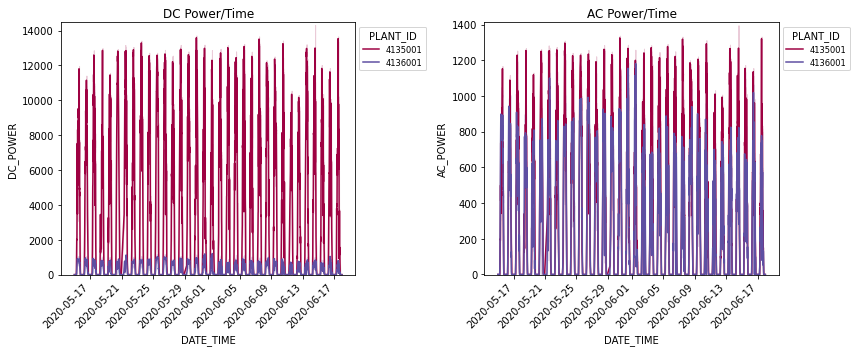

<ipython-input-13-898470abfe5d>:36: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  res_gen_data = gen_data_c.groupby('PLANT_ID')["AC_POWER", "DC_POWER", "DATE_TIME"].resample('1D', label='left', on="DATE_TIME").sum().reset_index()


    PLANT_ID  DATE_TIME       AC_POWER      DC_POWER
0    4135001 2020-05-15  550830.959402  5.627239e+06
1    4135001 2020-05-16  568359.821428  5.806138e+06
2    4135001 2020-05-17  660975.389285  6.759595e+06
3    4135001 2020-05-18  470969.708929  4.812549e+06
4    4135001 2020-05-19  532250.491070  5.437955e+06
..       ...        ...            ...           ...
63   4136001 2020-06-13  445507.764286  4.553058e+05
64   4136001 2020-06-14  495073.503333  5.059115e+05
65   4136001 2020-06-15  402322.124286  4.109989e+05
66   4136001 2020-06-16  470830.427143  4.808101e+05
67   4136001 2020-06-17  372436.317143  3.802112e+05

[68 rows x 4 columns]


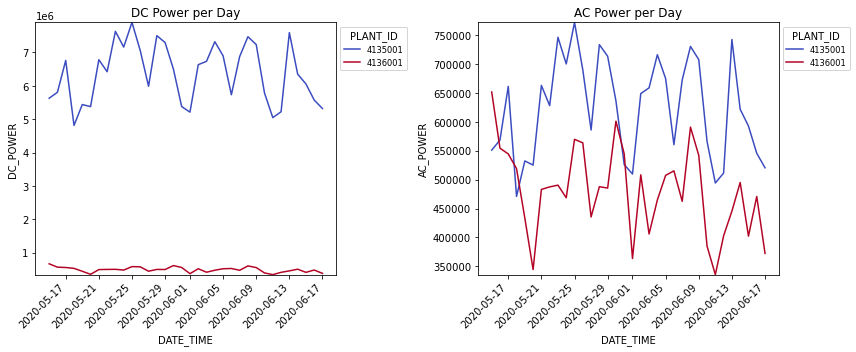

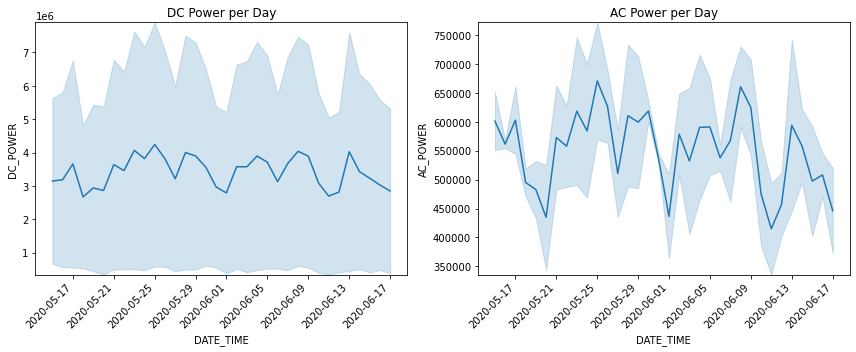

In [13]:
# set seaborn info
# set color palette
#sns.set_palette(sns.color_palette("Paired"))

# AC/DC
#gen_data_c.reset_index(inplace=True)
print(gen_data_c)
myFmt = mdates.DateFormatter('%Y-%m-%d')

f, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(data=gen_data_c, x="DATE_TIME", y="DC_POWER", ax=axes[0], hue="PLANT_ID", palette=sns.color_palette("Spectral", as_cmap=True))#sns.color_palette('coolwarm', as_cmap = True)
sns.lineplot(data=gen_data_c, x="DATE_TIME", y="AC_POWER", ax=axes[1], hue="PLANT_ID", palette=sns.color_palette("Spectral", as_cmap=True))#sns.color_palette('coolwarm', as_cmap = True)

axes[0].xaxis.set_major_formatter(myFmt)
axes[1].xaxis.set_major_formatter(myFmt)
plt.setp(axes[0].get_xticklabels(), rotation=45, ha="right")
plt.setp(axes[1].get_xticklabels(), rotation=45, ha="right")

axes[0].legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small', title="PLANT_ID")
axes[0].set_title("DC Power/Time")
axes[0].set(ylim=(min(gen_data_c["DC_POWER"])-1, max(gen_data_c["DC_POWER"]) + 1))
axes[1].legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small', title="PLANT_ID")
axes[1].set_title("AC Power/Time")
axes[1].set(ylim=(min(gen_data_c["AC_POWER"])-1, max(gen_data_c["AC_POWER"]) + 1))
plt.tight_layout()

plt.show()

# resample DF

# standard resample
# res_gen_data = gen_data_c.resample('15min', label='left').sum().reset_index()

# groupby with PLANT_ID resample, aggregate by sum "AC_POWER", "DC_POWER" -> This way we can use hue to distinguish PLANT_ID in lineplot
res_gen_data = gen_data_c.groupby('PLANT_ID')["AC_POWER", "DC_POWER", "DATE_TIME"].resample('1D', label='left', on="DATE_TIME").sum().reset_index()
print(res_gen_data)

f1, axes1 = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(data=res_gen_data, x="DATE_TIME", y="DC_POWER", ax=axes1[0], hue="PLANT_ID", palette=sns.color_palette('coolwarm', as_cmap = True))
sns.lineplot(data=res_gen_data, x="DATE_TIME", y="AC_POWER", ax=axes1[1], hue="PLANT_ID", palette=sns.color_palette('coolwarm', as_cmap = True))

axes1[0].xaxis.set_major_formatter(myFmt)
axes1[1].xaxis.set_major_formatter(myFmt)
plt.setp(axes1[0].get_xticklabels(), rotation=45, ha="right")
plt.setp(axes1[1].get_xticklabels(), rotation=45, ha="right")

axes1[0].legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small', title="PLANT_ID")
axes1[0].set_title("DC Power per Day")
axes1[0].set(ylim=(min(res_gen_data["DC_POWER"])-1, max(res_gen_data["DC_POWER"])+1))
axes1[1].legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small', title="PLANT_ID")
axes1[1].set_title("AC Power per Day")
axes1[1].set(ylim=(min(res_gen_data["AC_POWER"])-1, max(res_gen_data["AC_POWER"])+1))
plt.tight_layout()

plt.show()

f2, axes2 = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(data=res_gen_data, x="DATE_TIME", y="DC_POWER", ax=axes2[0])
sns.lineplot(data=res_gen_data, x="DATE_TIME", y="AC_POWER", ax=axes2[1])

axes2[0].xaxis.set_major_formatter(myFmt)
axes2[1].xaxis.set_major_formatter(myFmt)
plt.setp(axes2[0].get_xticklabels(), rotation=45, ha="right")
plt.setp(axes2[1].get_xticklabels(), rotation=45, ha="right")

#axes2[0].legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small', title="PLANT_ID")
axes2[0].set_title("DC Power per Day")
axes2[0].set(ylim=(min(res_gen_data["DC_POWER"])-1, max(res_gen_data["DC_POWER"]) + 1))
#axes2[1].legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small', title="PLANT_ID")
axes2[1].set_title("AC Power per Day")
axes2[1].set(ylim=(min(res_gen_data["AC_POWER"])-1, max(res_gen_data["AC_POWER"]) + 1))
plt.tight_layout()
plt.show()

               DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0    2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1    2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2    2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3    2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4    2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   
...                  ...       ...              ...                  ...   
3254 2020-06-17 22:45:00   4136001  iq8k7ZNt4Mwm3w0            23.511703   
3255 2020-06-17 23:00:00   4136001  iq8k7ZNt4Mwm3w0            23.482282   
3256 2020-06-17 23:15:00   4136001  iq8k7ZNt4Mwm3w0            23.354743   
3257 2020-06-17 23:30:00   4136001  iq8k7ZNt4Mwm3w0            23.291048   
3258 2020-06-17 23:45:00   4136001  iq8k7ZNt4Mwm3w0            23.202871   

      MODULE_TEMPERATURE  IRRADIATION  
0              22.857507          0.0  
1      

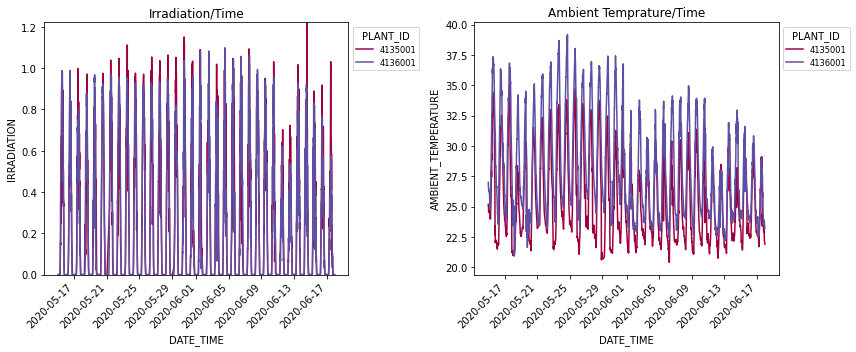

<ipython-input-14-09e6685109fd>:36: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  res_wea_data = wea_data_c.groupby('PLANT_ID')["IRRADIATION", "AMBIENT_TEMPERATURE", "DATE_TIME"].resample('1D', label='left', on="DATE_TIME").sum().reset_index()


    PLANT_ID  DATE_TIME  IRRADIATION  AMBIENT_TEMPERATURE
0    4135001 2020-05-15    19.037010          2551.066519
1    4135001 2020-05-16    18.651690          2356.687377
2    4135001 2020-05-17    22.931378          2561.925788
3    4135001 2020-05-18    15.266485          2289.690001
4    4135001 2020-05-19    18.044861          2356.435952
..       ...        ...          ...                  ...
63   4136001 2020-06-13    20.690174          2507.225956
64   4136001 2020-06-14    22.033630          2593.899844
65   4136001 2020-06-15    17.765047          2549.528748
66   4136001 2020-06-16    15.845917          2531.510127
67   4136001 2020-06-17    11.940765          2385.808748

[68 rows x 4 columns]


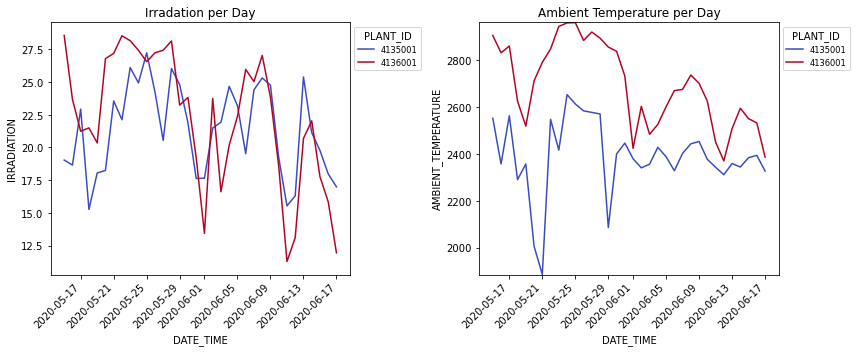

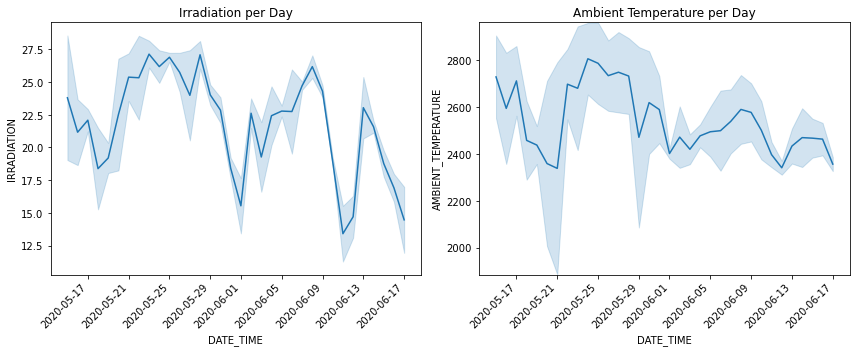

In [14]:
# set seaborn info
# set color palette
#sns.set_palette(sns.color_palette("Paired"))

# AC/DC
#gen_data_c.reset_index(inplace=True)
print(wea_data_c)
myFmt = mdates.DateFormatter('%Y-%m-%d')

f, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(data=wea_data_c, x="DATE_TIME", y="IRRADIATION", ax=axes[0], hue="PLANT_ID", palette=sns.color_palette("Spectral", as_cmap=True))#sns.color_palette('coolwarm', as_cmap = True)
sns.lineplot(data=wea_data_c, x="DATE_TIME", y="AMBIENT_TEMPERATURE", ax=axes[1], hue="PLANT_ID", palette=sns.color_palette("Spectral", as_cmap=True))#sns.color_palette('coolwarm', as_cmap = True)

axes[0].xaxis.set_major_formatter(myFmt)
axes[1].xaxis.set_major_formatter(myFmt)
plt.setp(axes[0].get_xticklabels(), rotation=45, ha="right")
plt.setp(axes[1].get_xticklabels(), rotation=45, ha="right")

axes[0].legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small', title="PLANT_ID")
axes[0].set_title("Irradiation/Time")
axes[0].set(ylim=(min(wea_data_c["IRRADIATION"]), max(wea_data_c["IRRADIATION"])))
axes[1].legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small', title="PLANT_ID")
axes[1].set_title("Ambient Temprature/Time")
axes[1].set(ylim=(min(wea_data_c["AMBIENT_TEMPERATURE"])-1, max(wea_data_c["AMBIENT_TEMPERATURE"]) + 1))
plt.tight_layout()

plt.show()

# resample DF

# standard resample
# res_gen_data = gen_data_c.resample('15min', label='left').sum().reset_index()

# groupby with PLANT_ID resample, aggregate by sum "AC_POWER", "DC_POWER" -> This way we can use hue to distinguish PLANT_ID in lineplot
res_wea_data = wea_data_c.groupby('PLANT_ID')["IRRADIATION", "AMBIENT_TEMPERATURE", "DATE_TIME"].resample('1D', label='left', on="DATE_TIME").sum().reset_index()
print(res_wea_data)

f1, axes1 = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(data=res_wea_data, x="DATE_TIME", y="IRRADIATION", ax=axes1[0], hue="PLANT_ID", palette=sns.color_palette('coolwarm', as_cmap = True))
sns.lineplot(data=res_wea_data, x="DATE_TIME", y="AMBIENT_TEMPERATURE", ax=axes1[1], hue="PLANT_ID", palette=sns.color_palette('coolwarm', as_cmap = True))

axes1[0].xaxis.set_major_formatter(myFmt)
axes1[1].xaxis.set_major_formatter(myFmt)
plt.setp(axes1[0].get_xticklabels(), rotation=45, ha="right")
plt.setp(axes1[1].get_xticklabels(), rotation=45, ha="right")

axes1[0].legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small', title="PLANT_ID")
axes1[0].set_title("Irradation per Day")
axes1[0].set(ylim=(min(res_wea_data["IRRADIATION"])-1, max(res_wea_data["IRRADIATION"])+1))
axes1[1].legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small', title="PLANT_ID")
axes1[1].set_title("Ambient Temperature per Day")
axes1[1].set(ylim=(min(res_wea_data["AMBIENT_TEMPERATURE"])-1, max(res_wea_data["AMBIENT_TEMPERATURE"])+1))
plt.tight_layout()

plt.show()

f2, axes2 = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(data=res_wea_data, x="DATE_TIME", y="IRRADIATION", ax=axes2[0])
sns.lineplot(data=res_wea_data, x="DATE_TIME", y="AMBIENT_TEMPERATURE", ax=axes2[1])

axes2[0].xaxis.set_major_formatter(myFmt)
axes2[1].xaxis.set_major_formatter(myFmt)
plt.setp(axes2[0].get_xticklabels(), rotation=45, ha="right")
plt.setp(axes2[1].get_xticklabels(), rotation=45, ha="right")

#axes2[0].legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small', title="PLANT_ID")
axes2[0].set_title("Irradiation per Day")
axes2[0].set(ylim=(min(res_wea_data["IRRADIATION"])-1, max(res_wea_data["IRRADIATION"]) + 1))
#axes2[1].legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small', title="PLANT_ID")
axes2[1].set_title("Ambient Temperature per Day")
axes2[1].set(ylim=(min(res_wea_data["AMBIENT_TEMPERATURE"])-1, max(res_wea_data["AMBIENT_TEMPERATURE"]) + 1))
plt.tight_layout()
plt.show()

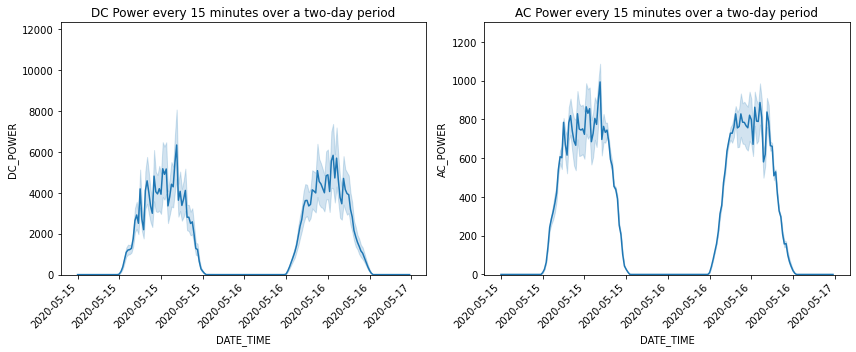

In [15]:
# A single day time interval seems to be the best choice for all variables. However, to show the variability 
# on a single day with 15 minutes time interval, the following plot are produced. 

two_day_gen_data = gen_data_c[gen_data_c['DATE_TIME']<'2020-05-17']

f2, axes2 = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(data=two_day_gen_data, x="DATE_TIME", y="DC_POWER", ax=axes2[0])
sns.lineplot(data=two_day_gen_data, x="DATE_TIME", y="AC_POWER", ax=axes2[1])

axes2[0].xaxis.set_major_formatter(myFmt)
axes2[1].xaxis.set_major_formatter(myFmt)
plt.setp(axes2[0].get_xticklabels(), rotation=45, ha="right")
plt.setp(axes2[1].get_xticklabels(), rotation=45, ha="right")

#axes2[0].legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small', title="PLANT_ID")
axes2[0].set_title("DC Power every 15 minutes over a two-day period")
axes2[0].set(ylim=(min(two_day_gen_data["DC_POWER"])-1, max(two_day_gen_data["DC_POWER"]) + 1))
#axes2[1].legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small', title="PLANT_ID")
axes2[1].set_title("AC Power every 15 minutes over a two-day period")
axes2[1].set(ylim=(min(two_day_gen_data["AC_POWER"])-1, max(two_day_gen_data["AC_POWER"]) + 1))
plt.tight_layout()
plt.show()

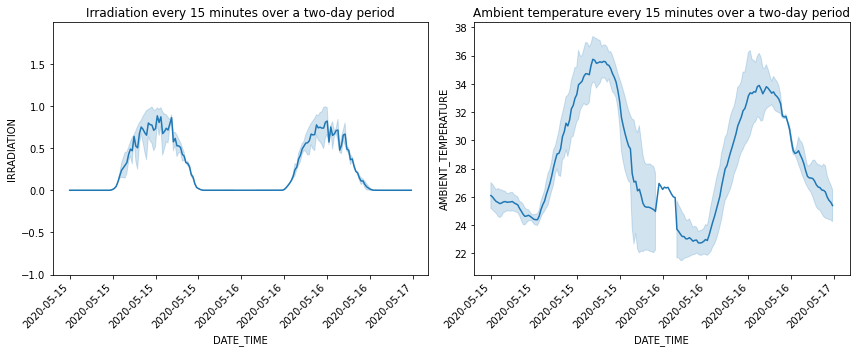

In [16]:
# A single day time interval seems to be the best choice for all variables. However, to show the variability 
# on a single day with 15 minutes time interval, the following plot are produced. 

two_day_wea_data = wea_data_c[wea_data_c['DATE_TIME']<'2020-05-17']

f2, axes2 = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(data=two_day_wea_data, x="DATE_TIME", y="IRRADIATION", ax=axes2[0])
sns.lineplot(data=two_day_wea_data, x="DATE_TIME", y="AMBIENT_TEMPERATURE", ax=axes2[1])

axes2[0].xaxis.set_major_formatter(myFmt)
axes2[1].xaxis.set_major_formatter(myFmt)
plt.setp(axes2[0].get_xticklabels(), rotation=45, ha="right")
plt.setp(axes2[1].get_xticklabels(), rotation=45, ha="right")

#axes2[0].legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small', title="PLANT_ID")
axes2[0].set_title("Irradiation every 15 minutes over a two-day period")
axes2[0].set(ylim=(min(two_day_wea_data["IRRADIATION"])-1, max(two_day_wea_data["IRRADIATION"]) + 1))
#axes2[1].legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize='small', title="PLANT_ID")
axes2[1].set_title("Ambient temperature every 15 minutes over a two-day period")
axes2[1].set(ylim=(min(two_day_wea_data["AMBIENT_TEMPERATURE"])-1, max(two_day_wea_data["AMBIENT_TEMPERATURE"]) + 1))
plt.tight_layout()
plt.show()